In [1]:
import matplotlib as mpl
import matplotlib.colors 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.optimize as spopt

import populationevolution_v5 as popev
import SweepApproximationFunctions as SAF
import sweep_approx_compare_to_full_sim as sactfs

np.random.seed(42)
plt.style.use(('C:\\Users\\Nicholas Sherer\\.matplotlib\\Sherer_Thesis.mplstyle'))
%matplotlib inline

In [2]:
cd Thesis_Data_and_Figures

E:\Documents\Python Evolution Simulation\Population Evolution Project Source Code\Thesis_Data_and_Figures


# Plots of the steady state approximation to the fitness and mutation rate distribution of the population and comparison to full simulation

In [3]:
params = {'mu_min': .01, 'delta_f': .02, 'M': 3, 'P_mu': .1, 'K': 10**6}
mu_list, f_list, Neq, deltaNs = sactfs.compareNeq_Ntrue(**params,t=10**5)

In [4]:
def logNbarplot(ax, mu, f, N):
    xmesh, ymesh = np.meshgrid(np.arange(mu.size),-np.arange(f.size))
    xmesh = xmesh.ravel()
    ymesh = ymesh.ravel()
    logN = np.maximum(0,np.log(N.flatten()))
    bottom = np.zeros_like(logN)
    width=1
    depth=1
    ax.bar3d(xmesh, ymesh, bottom, width, depth, logN, shade=True);
    ax.view_init(elev = 45, azim=-45);
    ax.set_xticklabels('{:2g}'.format(m) for m in mu);
    ax.set_yticks(-np.arange(f.size))
    ax.set_yticklabels(['{:2g}'.format(f_) for f_ in f], fontsize='medium')
    zticks = ax.get_zticks()
    ax.set_zticklabels('{0:.2g}'.format(np.exp(v)) for v in zticks)
    
def Nbarplot(ax, mu, f, N):
    xmesh, ymesh = np.meshgrid(np.arange(mu.size),-np.arange(f.size))
    xmesh = xmesh.ravel()
    ymesh = ymesh.ravel()
    N_ = N.flatten()
    bottom = np.zeros_like(N_)
    width=1
    depth=1
    ax.bar3d(xmesh, ymesh, bottom, width, depth, N_, shade=True);
    ax.view_init(elev = 45, azim=-45);
    ax.set_xticklabels('{:2g}'.format(m) for m in mu);
    ax.set_yticks(-np.arange(f.size))
    ax.set_yticklabels(['{:2g}'.format(f_) for f_ in f], fontsize='medium')

# class below shamelessly copied from https://matplotlib.org/users/colormapnorms.html
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    
def Ncolormesh(fig, ax, mu, f, N, cmap='PiYG'):
    pcm = ax.pcolormesh(N, cmap=cmap, norm=MidpointNormalize(midpoint=0), edgecolors='k')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xticklabels('{:2g}'.format(m) for m in mu)
    ax.set_yticks(np.arange(f.size))
    ax.set_yticklabels(['{:2g}'.format(f_) for f_ in f])
    fig.colorbar(pcm)

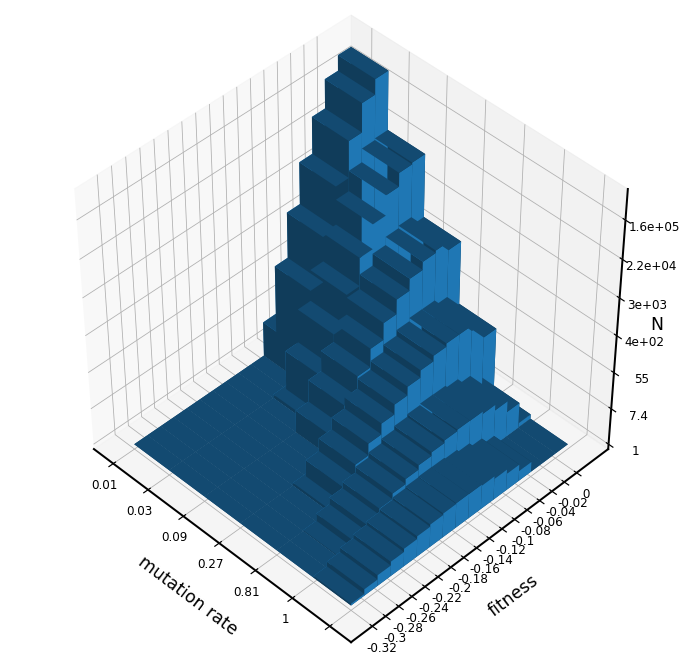

In [5]:
fig = plt.figure(figsize=(12,12));
ax = fig.add_subplot(111, projection='3d');
logNbarplot(ax, mu_list, f_list[:17], Neq[:17,:]);
ax.set_xlabel('mutation rate', labelpad=20);
ax.set_ylabel('fitness', labelpad=20);
ax.set_zlabel('N');
ax.tick_params(axis="z",direction="out", pad=10);
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('Neq_approx.pdf')

E:\Anaconda3\envs\imageprocessing_windows\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


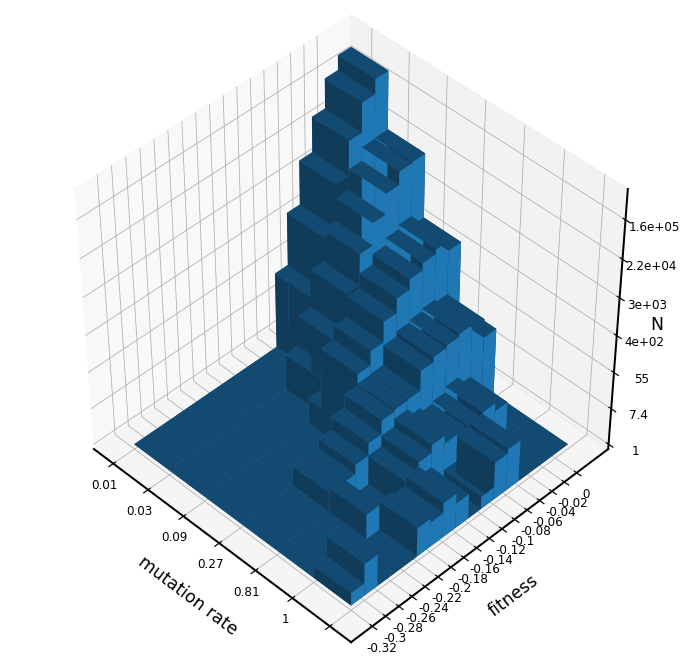

In [6]:
fig = plt.figure(figsize=(12,12));
ax = fig.add_subplot(111, projection='3d');
logNbarplot(ax, mu_list, f_list[:17], (Neq+deltaNs[100])[:17,:]);
ax.set_xlabel('mutation rate', labelpad=20);
ax.set_ylabel('fitness', labelpad=20);
ax.set_zlabel('N');
ax.tick_params(axis="z",direction="out", pad=10);
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('Neq_sampletime.pdf')

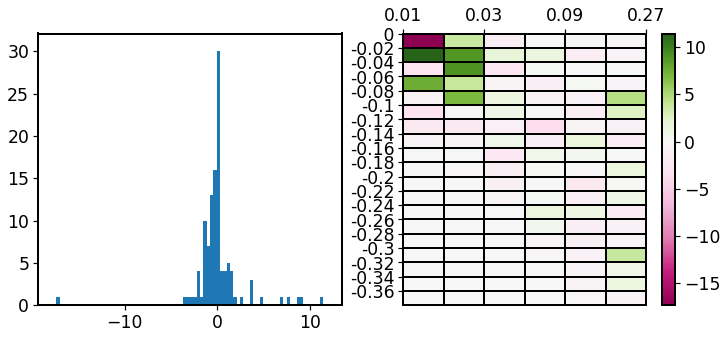

In [7]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
sample = 100
axes[0].hist(sactfs.delta_over_std(Neq[:19,:], deltaNs[100][:19,:]).flatten())
Ncolormesh(fig, axes[1], mu_list, f_list[:19], sactfs.delta_over_std(Neq[:19,:], deltaNs[100][:19,:]))

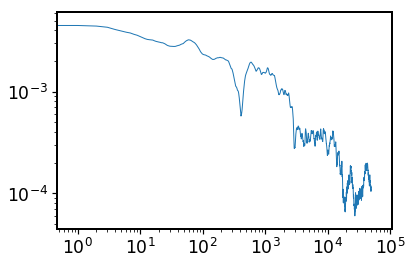

In [8]:
plt.loglog(sactfs.mean_probability_error(deltaNs[50000:], params['K']),marker='',linewidth='1')

In [9]:
params = {'mu_min': .01, 'delta_f': .02, 'M': 3, 'P_mu': .1, 'K': 10**6}
results_by_K = {}
Ks = 10**np.arange(3,10,dtype='int')
for K in Ks:
    params['K']=K
    results_by_K[K]={}
    mu_list, f_list, Neq, deltaNs = sactfs.compareNeq_Ntrue(**params,t=10**5)
    results_by_K[K]['mus']=mu_list
    results_by_K[K]['fs']=f_list
    results_by_K[K]['Neq']=Neq
    results_by_K[K]['deltaNs']=deltaNs

E:\Anaconda3\envs\imageprocessing_windows\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [10]:
errors_by_K = np.zeros_like(Ks,dtype='float64')
for i,K in enumerate(Ks):
    dNs = results_by_K[K]['deltaNs']
    err = sactfs.mean_probability_error(dNs[50000:],K)
    errors_by_K[i]=err[-1]

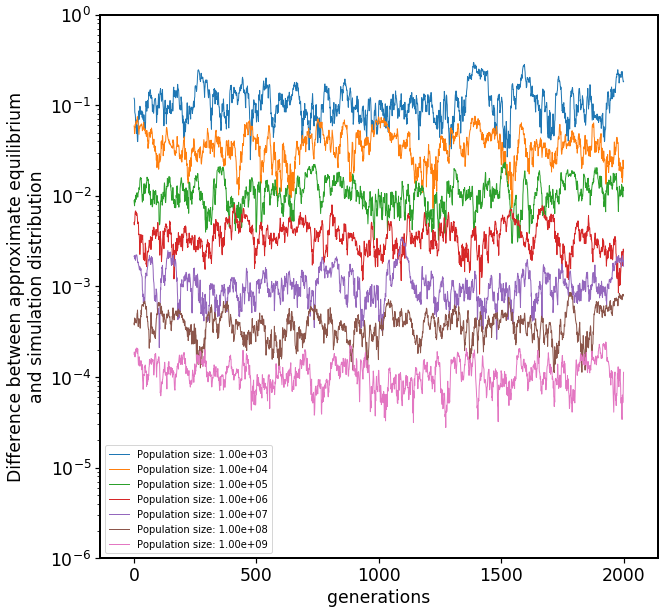

In [11]:
plt.figure(figsize=(10,10))
for K in Ks:
    dNs = results_by_K[K]['deltaNs']
    diff = np.sum(np.abs(dNs),axis=(1,2))/(2*K)
    plt.semilogy(diff[50000:52000], marker='', linewidth=1, label='Population size: {:.2e}'.format(K))
plt.legend()
plt.ylim(10**-6,1)
plt.xlabel('generations')
plt.ylabel('Difference between approximate equilibrium\nand simulation distribution')
plt.savefig('deltaN_vs_t.pdf')

In [12]:
def power_law(x, A, beta):
    return A*x**beta
err_power_fit = spopt.curve_fit(power_law, Ks, errors_by_K, sigma=errors_by_K, p0=(.3,-.5))

In [13]:
print('The coefficient and exponent are:', err_power_fit[0])
print('The uncertainty in these estimates are:', np.sqrt(err_power_fit[1][0,0]), np.sqrt(err_power_fit[1][1,1]))

The coefficient and exponent are: [ 0.28144701 -0.53887701]
The uncertainty in these estimates are: 0.2120184106574118 0.05130676457824669


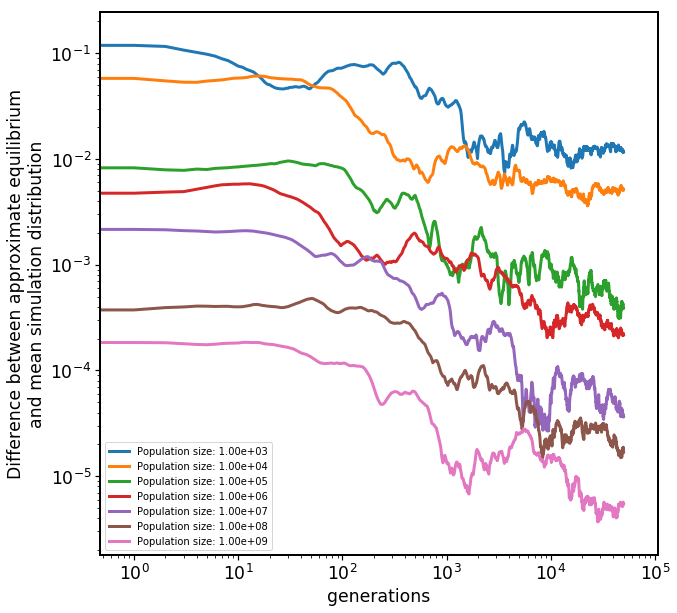

In [14]:
plt.figure(figsize=(10,10))
for K in Ks:
    dNs = results_by_K[K]['deltaNs']
    plt.loglog(sactfs.mean_probability_error(dNs[50000:],K),marker='',label='Population size: {:.2e}'.format(K))
plt.legend()
plt.xlabel('generations')
plt.ylabel('Difference between approximate equilibrium\nand mean simulation distribution')
plt.savefig('mean_deltaN_vs_t.pdf')

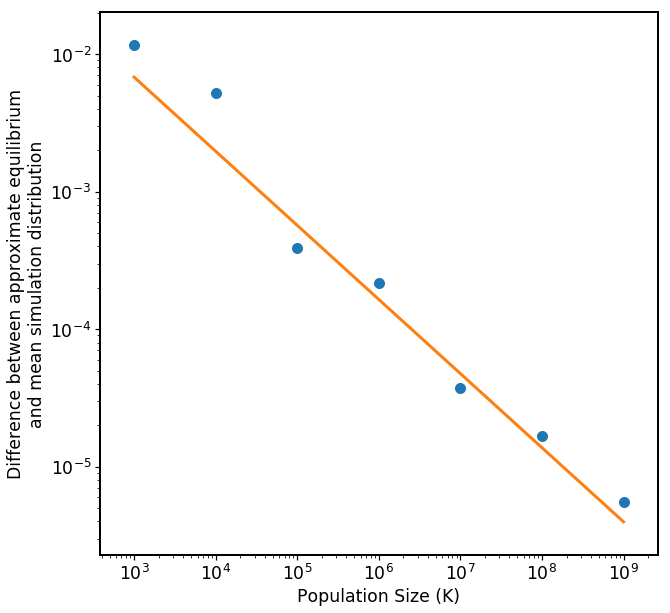

In [15]:
plt.figure(figsize=(10,10))
plt.loglog(Ks,errors_by_K,linestyle='')
plt.loglog(Ks,power_law(Ks,*err_power_fit[0]),marker='')
plt.xlabel('Population Size (K)')
plt.ylabel('Difference between approximate equilibrium\nand mean simulation distribution')
plt.savefig('mean_deltaN_vs_K.pdf')

# Plots of the approximation for the fixation probability and comparison to full simulation

In [16]:
fvary_params = []
for i in  np.arange(1,11)*.005:
    mu_min = .005
    delta_f = np.log(1+i)
    M=4
    P_mu = .1
    K = 10**6
    fvary_params.append([mu_min, delta_f, M, P_mu, K])
fvary_invasion_results = []
for params in fvary_params:
    invasion_results = {}
    test_count, fixations, fixation_times, extinction_times = sactfs.estimate_fix_prob(*params, 1, 0)
    invasion_results['test_count']=test_count
    invasion_results['fixations']=fixations
    invasion_results['fixation_times']=fixation_times
    invasion_results['extinction_times']=extinction_times
    fvary_invasion_results.append(invasion_results)

In [17]:
antimu_params = []
for i in np.arange(1,11)*.005:
    delta_f = .02
    M=4
    P_mu = .1
    K = 10**6
    mu_min = i/(1+i-1/M)
    antimu_params.append([mu_min, delta_f, M, P_mu, K])
antimu_invasion_results = []
for params in antimu_params:
    invasion_results = {}
    test_count, fixations, fixation_times, extinction_times = sactfs.estimate_fix_prob(*params, 0, -1)
    invasion_results['test_count']=test_count
    invasion_results['fixations']=fixations
    invasion_results['fixation_times']=fixation_times
    invasion_results['extinction_times']=extinction_times
    antimu_invasion_results.append(invasion_results)

In [18]:
mutator2_params = []
for i in np.arange(1,11)*.005:
    frac = .97
    delta_f = np.log((1+i)/frac)
    M=2
    P_mu = .1
    K = 10**6
    mu_min = (1 - frac)/(M - frac)
    mutator2_params.append([mu_min, delta_f, M, P_mu, K])
mutator2_invasion_results = []
for params in mutator2_params:
    invasion_results = {}
    test_count, fixations, fixation_times, extinction_times = sactfs.estimate_fix_prob(*params, 1, 1)
    invasion_results['test_count']=test_count
    invasion_results['fixations']=fixations
    invasion_results['fixation_times']=fixation_times
    invasion_results['extinction_times']=extinction_times
    mutator2_invasion_results.append(invasion_results)

In [19]:
mutator10_params = []
for i in np.arange(1,11)*.005:
    frac=.99
    delta_f = np.log((1+i)/frac)
    M=10
    P_mu = .1
    K = 10**6
    mu_min = (1-frac)/(M-frac)
    mutator10_params.append([mu_min, delta_f, M, P_mu, K])
mutator10_invasion_results = []
for params in mutator2_params:
    invasion_results = {}
    test_count, fixations, fixation_times, extinction_times = sactfs.estimate_fix_prob(*params, 1, 1)
    invasion_results['test_count']=test_count
    invasion_results['fixations']=fixations
    invasion_results['fixation_times']=fixation_times
    invasion_results['extinction_times']=extinction_times
    mutator10_invasion_results.append(invasion_results)

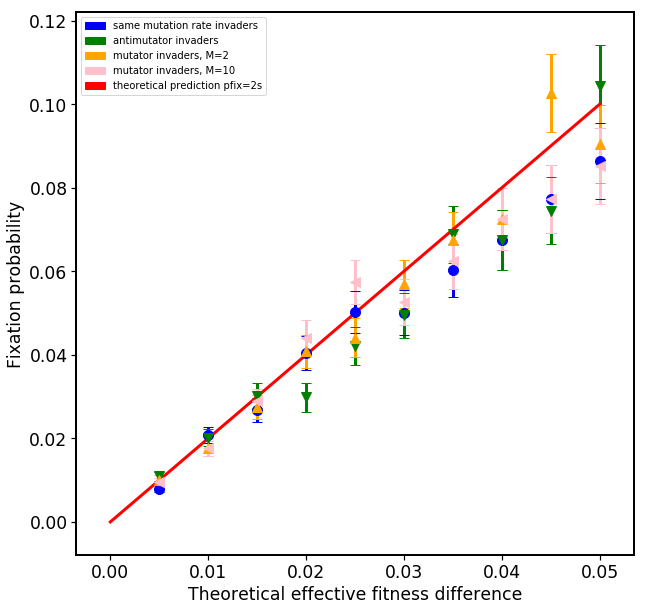

In [20]:
plt.figure(figsize=(10,10))
for params, results in zip(fvary_params,fvary_invasion_results):
    delta_f = params[1]
    s = np.exp(delta_f)-1
    N = results['test_count']
    p = results['fixations']/results['test_count']
    err = np.sqrt(p*N*(1-p))/N
    plt.errorbar(s, p, err, capsize=5, color='blue', marker='o')
for params, results in zip(antimu_params,antimu_invasion_results):
    mu_min = params[0]
    M = params[2]
    s = (1-mu_min/M)/(1-mu_min)-1
    N = results['test_count']
    p = results['fixations']/results['test_count']
    err = np.sqrt(p*N*(1-p))/N
    plt.errorbar(s, p, err, capsize=5, color='green', marker='v')
for params, results in zip(mutator2_params,mutator2_invasion_results):
    mu_min = params[0]
    delta_f = params[1]
    M = params[2]
    s = np.exp(delta_f)*(1-M*mu_min)/(1-mu_min)-1
    N = results['test_count']
    p = results['fixations']/results['test_count']
    err = np.sqrt(p*N*(1-p))/N
    plt.errorbar(s, p, err, capsize=5, color='orange', marker='^')
for params, results in zip(mutator10_params,mutator10_invasion_results):
    mu_min = params[0]
    delta_f = params[1]
    M = params[2]
    s = np.exp(delta_f)*(1-M*mu_min)/(1-mu_min)-1
    N = results['test_count']
    p = results['fixations']/results['test_count']
    err = np.sqrt(p*N*(1-p))/N
    plt.errorbar(s, p, err, capsize=5, color='pink', marker='<')
x = np.linspace(0,.05)
plt.plot(x,2*x,color='red',marker='')
plt.xlabel('Theoretical effective fitness difference')
plt.ylabel('Fixation probability')
delta_f_only_patch = mpl.patches.Patch(color='blue', label='same mutation rate invaders')
antimutator_patch = mpl.patches.Patch(color='green', label='antimutator invaders')
mutator2_patch = mpl.patches.Patch(color='orange', label='mutator invaders, M=2')
mutator10_patch = mpl.patches.Patch(color='pink', label='mutator invaders, M=10')
theoretical_patch = mpl.patches.Patch(color='red', label='theoretical prediction pfix=2s')
plt.legend(handles=[delta_f_only_patch, antimutator_patch, mutator2_patch, mutator10_patch, theoretical_patch])
plt.savefig('fixation_probability.pdf')

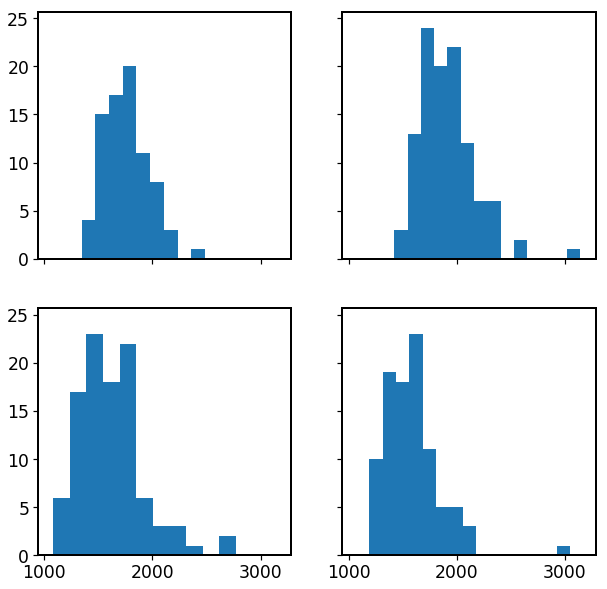

In [21]:
fig, ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax[0,0].hist(fvary_invasion_results[0]['fixation_times']);
ax[0,1].hist(antimu_invasion_results[0]['fixation_times']);
ax[1,0].hist(mutator2_invasion_results[0]['fixation_times']);
ax[1,1].hist(mutator10_invasion_results[0]['fixation_times']);

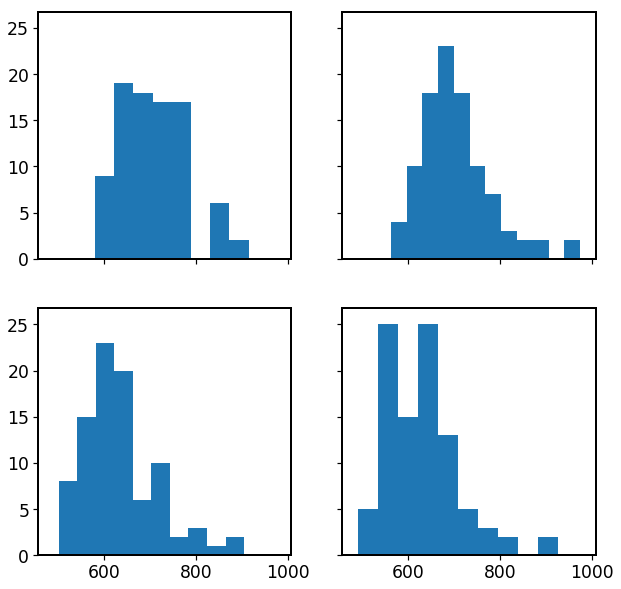

In [22]:
fig, ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax[0,0].hist(fvary_invasion_results[2]['fixation_times']);
ax[0,1].hist(antimu_invasion_results[2]['fixation_times']);
ax[1,0].hist(mutator2_invasion_results[2]['fixation_times']);
ax[1,1].hist(mutator10_invasion_results[2]['fixation_times']);

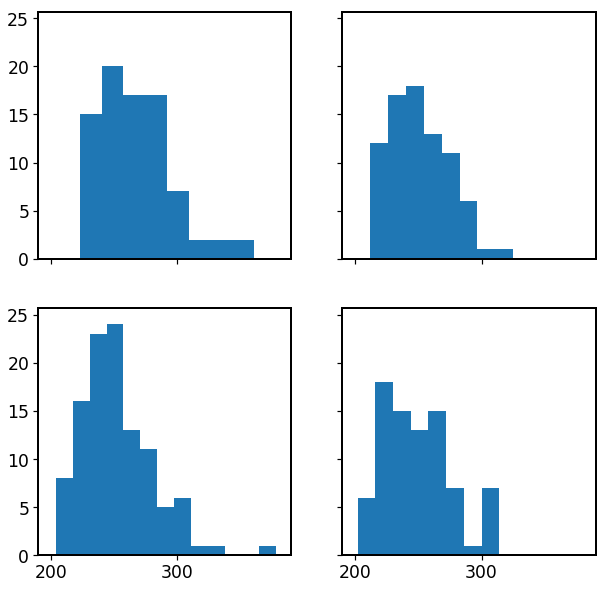

In [23]:
fig, ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax[0,0].hist(fvary_invasion_results[8]['fixation_times']);
ax[0,1].hist(antimu_invasion_results[8]['fixation_times']);
ax[1,0].hist(mutator2_invasion_results[8]['fixation_times']);
ax[1,1].hist(mutator10_invasion_results[8]['fixation_times']);

(200, 2000)

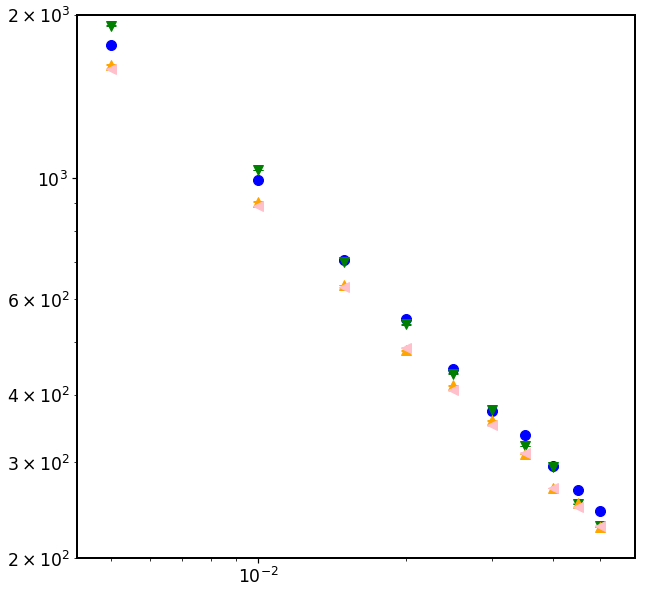

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for params, results in zip(fvary_params,fvary_invasion_results):
    delta_f = params[1]
    s = np.exp(delta_f)-1
    t_fix = np.mean(results['fixation_times'])
    t_fix_std = np.std(results['fixation_times'])/len(results['fixation_times'])
    ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='blue', marker='o')
for params, results in zip(antimu_params,antimu_invasion_results):
    mu_min = params[0]
    M = params[2]
    s = (1-mu_min/M)/(1-mu_min)-1
    t_fix = np.mean(results['fixation_times'])
    t_fix_std = np.std(results['fixation_times'])/len(results['fixation_times'])
    ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='green', marker='v')
for params, results in zip(mutator2_params,mutator2_invasion_results):
    mu_min = params[0]
    delta_f = params[1]
    M = params[2]
    s = np.exp(delta_f)*(1-M*mu_min)/(1-mu_min)-1
    t_fix = np.mean(results['fixation_times'])
    t_fix_std = np.std(results['fixation_times'])/len(results['fixation_times'])
    ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='orange', marker='^')
for params, results in zip(mutator10_params,mutator10_invasion_results):
    mu_min = params[0]
    delta_f = params[1]
    M = params[2]
    s = np.exp(delta_f)*(1-M*mu_min)/(1-mu_min)-1
    t_fix = np.mean(results['fixation_times'])
    t_fix_std = np.std(results['fixation_times'])/len(results['fixation_times'])
    ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='pink', marker='<')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(200,2000)

In [28]:
cd ..

E:\Documents\Python Evolution Simulation\Population Evolution Project Source Code


# Plots of typical paths of the mode of the mutation rate and fitness over time.

In [30]:
sweep_example1 = popev.PopulationReader('sweep_sim2datetime.datetime(2019, 4, 13, 10, 46, 22, 798327).hdf5')
sweep_example2 = popev.PopulationReader('sweep_sim2datetime.datetime(2019, 4, 13, 1, 18, 50, 212418).hdf5')
sweep_example3 = popev.PopulationReader('sweep_sim2datetime.datetime(2019, 4, 12, 20, 28, 55, 329862).hdf5')

def params_string(run):
    delta_f = run.delta_fitness
    M = run.mu_multiple
    p_b = run.fraction_benefical
    p_a = run.fraction_accurate
    P_mu = run.fraction_mu2mu
    K = run.pop_cap
    s = 'delta_f: {}, M: {}, p_b: {}, p_a: {}, P_mu: {}, K: {}'.format(delta_f, M, p_b, p_a, P_mu, K)
    return s

print('example1 has params '+params_string(sweep_example1) + '.')
print('example2 has params '+params_string(sweep_example2) + '.')
print('example3 has params '+params_string(sweep_example3) + '.')

example1 has params delta_f: 0.04, M: 2, p_b: 1e-06, p_a: 2e-06, P_mu: 0.3, K: 21000.
example2 has params delta_f: 0.4, M: 8, p_b: 1e-07, p_a: 3.0000000000000004e-08, P_mu: 0.05, K: 630000.
example3 has params delta_f: 0.2, M: 4, p_b: 1e-06, p_a: 1e-06, P_mu: 0.1, K: 58000.


In [31]:
def fmu_mode_trajectory(run):
    fmu_pairs = np.transpose(np.array([run.mode_fitness[:], run.mode_mutation_rate[:]]))
    return sactfs.value_array_to_waiting_times(fmu_pairs)

fmu1, tau1 = fmu_mode_trajectory(sweep_example1)
fmu2, tau2 = fmu_mode_trajectory(sweep_example2)
fmu3, tau3 = fmu_mode_trajectory(sweep_example3)

In [38]:
fmu1 = np.array(fmu1)
fmu2 = np.array(fmu2)
fmu3 = np.array(fmu3)
tau1 = np.array(tau1)
tau2 = np.array(tau2)
tau3 = np.array(tau3)

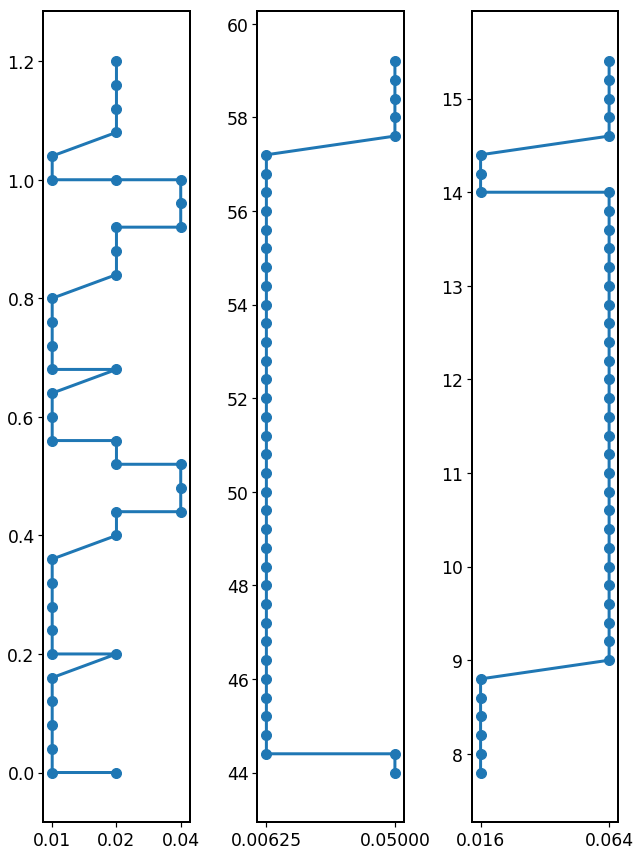

In [74]:
def int_to_tex(x, prec=1, upper_bound=999):
    if np.abs(x) > upper_bound:
        loglead, exp = np.modf(np.log10(x))
        lead = 10**loglead
        exp = int(exp)
        return "${0:.{2}f} \\times 10^{{{1}}}$".format(lead,exp,prec)
    else:
        return "{0:d}".format(x, prec)

def plot_mufpath(fig, ax, fmu, tau, line_params=None, text_params=None):
    if line_params is None:
        line_params={'marker': 'o'}
    if text_params is None:
        text_params={'size': 'large', 'ha': 'center'}
    ax.plot(fmu[:,1],fmu[:,0],**line_params)
    ax.set_xscale('log')
    ax.minorticks_off()
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(np.unique(fmu[:,-1]))
    #for i, j, s in zip(fmu[:,1],fmu[:,0],tau):
        #ax.text(i,j,int_to_tex(s, 1, 999), **text_params)

fig, axes = plt.subplots(1, 3, figsize=(9,12))
plot_mufpath(fig, axes[0], fmu1[:40], tau1[:40])
plot_mufpath(fig, axes[1], fmu2[110:150], tau2[110:150])
plot_mufpath(fig, axes[2], fmu3[40:80], tau3[40:80])
fig.tight_layout()

In [37]:
np.array(fmu1).shape

(1600, 2)

# Plots of the predicted transitions rates between fitness and mutation rate modes in the sweep regime and predicted distribution of the mode of the mutation rate over time

# Plots of transition rates inferred from simulation and distribution of the mode of the mutation rate in a simulation